In [3]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df

,user_id,avg_score,avg_time_spent
0,1,0.44,0.97
1,2,0.96,0.80
2,3,0.76,0.95
3,4,0.64,0.91
4,5,0.24,0.64
5,6,0.24,0.93
6,7,0.15,0.18
7,8,0.88,0.28
8,9,0.64,0.14
9,10,0.74,0.39


from matplotlib import pyplot as plt
df['user_id'].plot(kind='hist', bins=20, title='user_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['avg_score'].plot(kind='hist', bins=20, title='avg_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['avg_time_spent'].plot(kind='hist', bins=20, title='avg_time_spent')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='user_id', y='avg_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='avg_score', y='avg_time_spent', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['user_id']
  ys = series['avg_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('user_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('user_id')
_ = plt.ylabel('avg_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['user_id']
  ys = series['avg_time_spent']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('user_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('user_id')
_ = plt.ylabel('avg_time_spent')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['user_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'user_id'}, axis=1)
              .sort_values('user_id', ascending=True))
  xs = counted['user_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('user_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('user_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['user_id'].plot(kind='line', figsize=(8, 4), title='user_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['avg_score'].plot(kind='line', figsize=(8, 4), title='avg_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['avg_time_spent'].plot(kind='line', figsize=(8, 4), title='avg_time_spent')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
X = df.iloc[:,1:].values

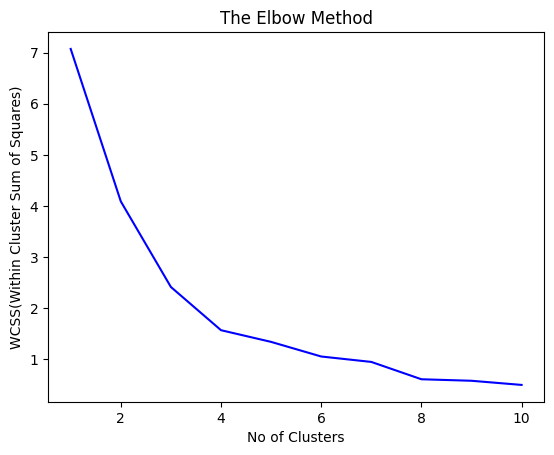

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,color='blue')
plt.title("The Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS(Within Cluster Sum of Squares)")
plt.show()

In [9]:
real_kmeans = KMeans(n_clusters=6,init='k-means++',random_state=42)
y_kmeans=real_kmeans.fit_predict(X)

In [10]:
print(y_kmeans)

[1 2 2 4 1 1 5 3 0 3 5 3 2 5 5 1 0 4 0 1 4 5 0 1 4 2 1 0 0 5 4 1 5 3 3 3 1
 1 2 4 5 4 1 2 1 4 1 4 0 5]


In [14]:
df["cluster"] = real_kmeans.labels_

In [15]:
cluster_means = df.groupby("cluster")[["avg_score", "avg_time_spent"]].mean()
print(cluster_means)

         avg_score  avg_time_spent
cluster                           
0         0.520000        0.192857
1         0.300769        0.766923
2         0.836667        0.811667
3         0.890000        0.323333
4         0.593333        0.714444
5         0.203333        0.298889


In [16]:
import joblib
joblib.dump(real_kmeans, 'model.pkl')


['model.pkl']